In [15]:
import pandas as pd
import sympy as smp
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.animation import FuncAnimation

import math

import scipy
from scipy import integrate
from scipy.signal import argrelextrema
from scipy.optimize import curve_fit
from scipy.optimize import newton

$$ \psi(x, 0 ) = \mathcal{N} e^{-\frac{x^2}{2 \sigma^2}} $$

Найти различия эволюции волновой функции дельта яме и без неё

$$ V(x) = - \frac{\hbar^2 \varkappa}{m} \delta(x - x_0)$$

В случае отстуствия дельта ямы:


$$ C(p) = \braket{\psi_p | \psi_{t = 0}} = \int \limits_{-\infty}^{+\infty} e^{- \frac{i p x}{\hbar}} \psi(x, 0) dx $$

$$ C(p) = \mathcal{N} \int \limits_{-\infty}^{+\infty} e^{-\frac{ipx}{\hbar} - \frac{x^2}{2 \sigma^2}} dx $$

Пусть $a = \frac{p}{\hbar}$, $b = \frac{1}{2 \sigma^2}$, тогда 

$$ -ia(z+ic)-b(z+ic)^2 = -bz^2 + (bc^2 + ac) - iz (2bc + a) \Rightarrow c = -\frac{a}{2b} = - \frac{p \sigma^2}{\hbar} $$
$$ bc^2 + ac = \frac{a^2}{4b^2}b - \frac{a^2}{2b} = - \frac{a^2}{4b} $$

При контуре в виде прямоугольника, стороны которого параллельны осям координат. Горизонтали проходят через $z = 0$, $z = -ic$. Интегралы по боковым сторонам стремятся к 0, при увеличении прямоугольника. Тогда
$$ C(p) = \mathcal{N} \int \limits_{-\infty}^{+\infty} e^{-\frac{ipx}{\hbar} - \frac{x^2}{2 \sigma^2}} dx = \mathcal{N} \int \limits_{-\infty}^{+\infty} e^{-bt^2-\frac{a^2}{4b}} dt = \mathcal{N} \sqrt{\frac{\pi}{b}} e^{-\frac{a^2}{4b}} = \mathcal{N} \sqrt{2\pi} \sigma e^{-\frac{p^2 \sigma^2}{2\hbar^2}}$$

$$ \psi(x, t) = \frac{1}{2 \pi \hbar} \int \limits_{-\infty}^{+\infty} C(p) \psi_p e^{- \frac{ip^2 t}{2m \hbar}} dp = \mathcal{N} \sqrt{2\pi} \frac{1}{2 \pi \hbar} \sigma  \int \limits_{-\infty}^{+\infty} e^{-\frac{p^2 \sigma^2}{2\hbar^2}} e^{- \frac{ip^2 t}{2m \hbar}}  e^{\frac{ipx}{\hbar}} dp$$

In [16]:
N, sigma = smp.symbols('N, sigma', real=True, positive=True)
x = smp.symbols('x', real=True)
p, m, h, t = smp.symbols('p, m, h, t', real=True, positive=True)

psi_p = smp.exp(smp.I * p * x / h)
c_p = N * (2 * smp.pi) ** 0.5 * sigma * smp.exp(- p ** 2 * sigma ** 2 / 2 / h ** 2)
expr = psi_p * c_p * smp.exp(- smp.I * p ** 2 * t / (2 * m * h)) / (2 * smp.pi * h)

res = smp.integrate(expr, (p, -smp.oo, smp.oo)).simplify()
res

Piecewise((0.707106781186548*sqrt(2)*N*sqrt(m)*sigma*exp_polar(I*pi/4)*exp(-m*x**2/(2*(I*h*t + m*sigma**2)))/sqrt(-h*t + m*sigma**2*exp_polar(I*pi/2)), (Abs(arg(-h*t*exp_polar(-I*pi/2)/(m*sigma**2) + 1)) < pi/2) | ((Abs(2*arg(x) + pi) < pi) & (Abs(2*arg(x) - pi) < pi) & (Abs(arg(-h*t*exp_polar(-I*pi/2)/(m*sigma**2) + 1)) <= pi/2))), (0.707106781186548*N*sigma*Integral(exp(p*(2*I*h*m*x - I*h*p*t - m*p*sigma**2)/(2*h**2*m)), (p, -oo, oo))/(pi**0.5*h), True))

Условие 2 выполняется для любого t, значит: 

$$\psi(x, t) = \sqrt{2m} \mathcal{N} \sigma (1 + i) e^{-\frac{mx^2}{2(i \hbar t + m \sigma^2)}} \frac{1}{\sqrt{im\sigma^2 - \hbar t}} $$

В случае дельта ямы добавляется 1 связанное стационарное состояние

$$ \psi_1(x) = \sqrt{\varkappa} e^{-\varkappa |x - x_0|}$$

при энергии $E = - \frac{\hbar^2}{2m} \varkappa^2$

$$C = \int \limits_{-\infty}^{+\infty}\sqrt{\varkappa} e^{-\varkappa |x - x_0|} \mathcal{N} e^{-\frac{x^2}{2 \sigma^2}} dx = \sqrt{\varkappa} \mathcal{N} \left(\int \limits_{-\infty}^{x_0} e^{\varkappa (x - x_0)}  e^{-\frac{x^2}{2 \sigma^2}} dx + \int \limits_{x_0}^{+\infty} e^{-\varkappa (x-x_0)}  e^{-\frac{x^2}{2 \sigma^2}} dx \right) = \sqrt{\varkappa} \mathcal{N} \left(\int \limits_{-\infty}^{x_0} e^{- \varkappa x_0}  e^{-\frac{x^2}{2 \sigma^2} + \varkappa x_0} dx + \int \limits_{x_0}^{+\infty} e^{-\varkappa x_0}  e^{-\frac{x^2}{2 \sigma^2} - \varkappa x} dx \right)$$
$$ = \sqrt{\varkappa} \mathcal{N} e^{\varkappa x_0} e^{\varkappa^2 \sigma^2/2} \frac{\sqrt{\pi}}{2} \text{erfc}\left(\frac{x_0}{\sqrt{2\sigma}} + \frac{\sigma \varkappa}{\sqrt{2}}\right) + \sqrt{\varkappa} \mathcal{N} e^{-\varkappa x_0} e^{\varkappa^2 \sigma^2/2} \frac{\sqrt{\pi}}{2} \text{erfc}\left(-\frac{x_0}{\sqrt{2\sigma}} + \frac{\sigma \varkappa}{\sqrt{2}}\right)$$ 

$$\psi(x, t) = \sqrt{2m} \mathcal{N} \sigma (1 + i) e^{-\frac{mx^2}{2(i \hbar t + m \sigma^2)}} \frac{1}{\sqrt{im\sigma^2 - \hbar t}} + C \psi_1 e^{-i \frac{\hbar \varkappa^2}{2m}t}$$

In [17]:
def psi_0(x, N = 1, sigma = 1):
    return N * np.exp(- x ** 2 / (2 * sigma ** 2))

def psi_1(x, x_0 = 0, kappa = 1):
    return kappa ** 0.5 * np.exp(-kappa * np.abs(x - x_0))

def CoeffBoundState(x_0 = 0, kappa = 1, N = 1, sigma = 1):
    return np.pi ** 0.5 / 2 * kappa ** 0.5 * N * np.exp(kappa ** 2 * sigma ** 2 / 2) * \
          (np.exp( kappa * x_0) * math.erfc( x_0 / (2 * sigma) ** 0.5 + sigma * kappa / 2 ** 0.5) + \
           np.exp(-kappa * x_0) * math.erfc(-x_0 / (2 * sigma) ** 0.5 + sigma * kappa / 2 ** 0.5))

def psi(x, t, x_0 = 0, kappa = 1, m = 1, h = 1, N = 1, sigma = 1):
    return (2 * m) ** 0.5 * N * sigma * (1 + 1j) * np.exp(- (m * x ** 2) / (2 * (1j * h * t + m * sigma ** 2))) / (1j * m * sigma ** 0.5 - h * t) ** 0.5 / 2 + \
            CoeffBoundState(x_0, kappa, N, sigma) * psi_1(x, x_0, kappa) * np.exp(-1j * h * kappa ** 2 / (2 * m) * t)

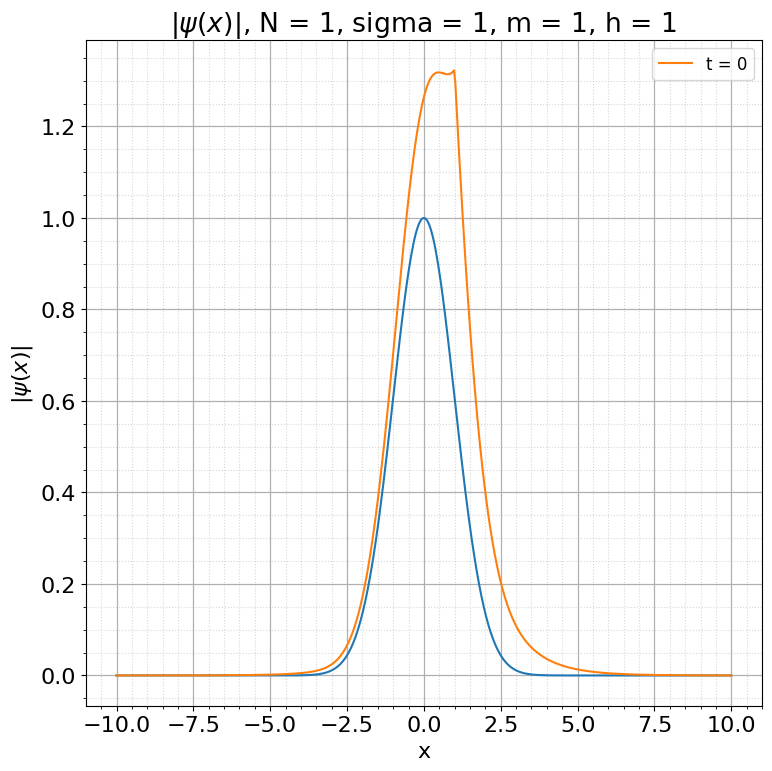

In [19]:
mpl.rcParams['font.size'] = 16                   # Управление стилем, в данном случаем - размером шрифта 
plt.figure(figsize = (8,8), facecolor = "white") # Создаем фигуру

# Подписываем оси и график
plt.title(r'$|\psi(x)|$, N = 1, sigma = 1, m = 1, h = 1')
plt.ylabel(r'$|\psi(x)|$')
plt.xlabel(r"x")

x = np.linspace(-10, 10, 500)
plt.plot(x, psi_0(x))


plt.plot(x, np.abs(psi(x, 0, 1, 1)), label='t = 0')
# plt.plot(x, np.abs(psi(x, 1, 1, 10)), label='t = 1')
# plt.plot(x, np.abs(psi(x, 2, 1, 10)), label='t = 2')
# plt.plot(x, np.abs(psi(x, 3, 1, 10)), label='t = 3')

plt.grid(visible = True, which = 'major', axis = 'both', alpha = 1, linewidth = 0.9)   # Активируем сетку
plt.grid(visible = True, which = 'minor', axis = 'both', alpha = 0.5, linestyle = ':')

plt.minorticks_on()
plt.tight_layout()
plt.legend(loc='best', fontsize = 12) # Активируем легенду графика
plt.show()